In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import cupy as cp
import numpy as np

# Testing on x*x arrays

In [79]:
sizes = [16, 32, 64, 128, 256, 512, 1024, 2048] # X * X pixel arrays/tensors
names = []

In [67]:
name = 'CuPy'
names.append(name)
cptimes = []
datas = [cp.random.normal(size=(x, x)).astype('complex128') for x in sizes]
for x, data in zip(sizes, datas):
    print('{} {}x{}'.format(name, x, x))
    t = %timeit -o fft = cp.fft.fft2(data)
    cptimes.append(t)

CuPy 16x16
330 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
CuPy 32x32
333 µs ± 3.83 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
CuPy 64x64
343 µs ± 5.39 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
CuPy 128x128
354 µs ± 3.98 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
CuPy 256x256
348 µs ± 2.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
CuPy 512x512
333 µs ± 4.98 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
CuPy 1024x1024
431 µs ± 67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
CuPy 2048x2048
2.19 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [68]:
name = 'Numpy'
names.append(name)
nptimes = []
datas = [np.random.normal(size=(x, x)).astype('complex128') for x in sizes]
for x, data in zip(sizes, datas):
    print('{} {}x{}'.format(name, x, x))
    t = %timeit -o fft = np.fft.fft2(data)
    nptimes.append(t)

Numpy 16x16
26.1 µs ± 1.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Numpy 32x32
37.3 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Numpy 64x64
74.1 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Numpy 128x128
219 µs ± 5.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Numpy 256x256
1.41 ms ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Numpy 512x512
6.59 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Numpy 1024x1024
30.4 ms ± 586 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Numpy 2048x2048
174 ms ± 8.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
cptimes = [t.average for t in cptimes]
nptimes = [t.average for t in nptimes]

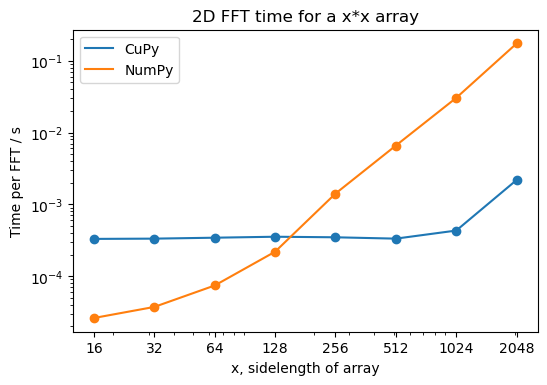

In [81]:
fig, ax = plt.subplots(dpi=100)
ax.set_yscale('log')
for name, times in zip(names, [cptimes, nptimes]):
    ax.scatter(sizes, times)
    ax.plot(sizes, times, label=name)
    
ax.set_title('2D FFT time for a x*x array')
plt.xlabel('x, sidelength of array')
plt.ylabel('Time per FFT / s')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xticks(sizes, sizes)
plt.legend();

# Testing on arrays of shape (100, x, x)

In [74]:
sizes = [16, 32, 64, 128, 256, 512] # X * X pixel arrays/tensors
names = []

In [17]:
name = 'CuPy'
names.append(name)
cptimes = []
datas = [cp.random.normal(size=(500, x, x)).astype('complex128') for x in sizes]
for x, data in zip(sizes, datas):
    print('{} {}x{}'.format(name, x, x))
    t = %timeit -o fft = cp.fft.fft2(data)
    cptimes.append(t)

CuPy 16x16
357 µs ± 3.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
CuPy 32x32
356 µs ± 2.62 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
CuPy 64x64
357 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
CuPy 128x128
The slowest run took 4.37 times longer than the fastest. This could mean that an intermediate result is being cached.
2.38 ms ± 731 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
CuPy 256x256
2.34 ms ± 90.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
CuPy 512x512
393 µs ± 52.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
name = 'Numpy'
names.append(name)
nptimes = []
datas = [np.random.normal(size=(500, x, x)).astype('complex128') for x in sizes]
for x, data in zip(sizes, datas):
    print('{} {}x{}'.format(name, x, x))
    t = %timeit -o fft = np.fft.fft2(data)
    nptimes.append(t)

Numpy 16x16
3.12 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Numpy 32x32
12.3 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Numpy 64x64
55.2 ms ± 4.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Numpy 128x128
236 ms ± 18.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Numpy 256x256
832 ms ± 70.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Numpy 512x512
3.39 s ± 22.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
cptimes2 = [t.average for t in cptimes]
nptimes2 = [t.average for t in nptimes]

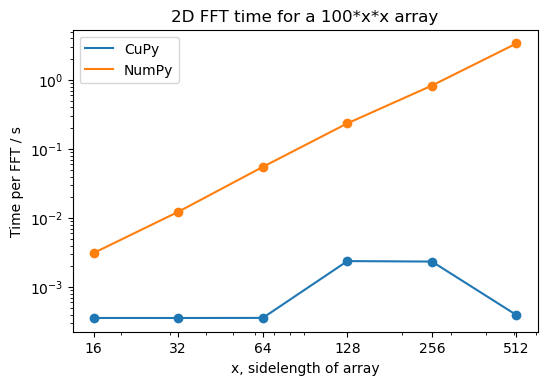

In [78]:
fig, ax = plt.subplots(dpi=100)
for name, times in zip(names, [cptimes2, nptimes2]):
    ax.scatter(sizes, times)
    ax.plot(sizes, times, label=name)
ax.set_title('2D FFT time for a 100*x*x array')
plt.xlabel('x, sidelength of array')
plt.ylabel('Time per FFT / s')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xticks(sizes, sizes)
plt.legend();